# **Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from stores_module import *
from recursive_predictions import *

from sklearn.metrics import mean_absolute_error as mae, root_mean_squared_log_error as rmsle


# **Store 25**

In [2]:
store_25 = store_data(25)
store_25.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1615 entries, 0 to 83458
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        1615 non-null   datetime64[ns]
 1   transactions                1615 non-null   int64         
 2   National Event              1615 non-null   category      
 3   National holiday            1615 non-null   category      
 4   National period of holiday  1615 non-null   category      
 5   National Workday            1615 non-null   category      
 6   Local Holiday               1615 non-null   category      
 7   Regional Holiday            1615 non-null   category      
 8   Workday                     1615 non-null   category      
 9   Transfer                    1615 non-null   category      
 10  onpromotion                 1615 non-null   int64         
 11  weekday                     1615 non-null   int32         
d

## **Categorical to numbers**

In [3]:
switch_binom = binom_cat_bool(store_25)

In [4]:
list_binom_store25, list_binom_dict_str25 = switch_binom.binom_bool()

In [5]:
store_25 = switch_binom.transform()

In [6]:
no_cat_list = ["not a national event","Not a Nat holiday","Nope"]
for col in store_25.columns:
    for no_cat in no_cat_list:
        if store_25[col].dtype == 'category' and no_cat in store_25[col].cat.categories:
            rename_null_cat(store_25,col,no_cat)

In [7]:
multinom_dict_list = []
for col in store_25.columns:
    if store_25[col].dtype == 'category':
        col_encod = my_labelEncoder()
        col_encod.fit(store_25,col)
        col_dict = col_encod.dict_cat
        multinom_dict_list.append(col_dict)
        store_25[col] = col_encod.transform(store_25,col)

In [8]:
store_25.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1615 entries, 0 to 83458
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        1615 non-null   datetime64[ns]
 1   transactions                1615 non-null   int64         
 2   National Event              1615 non-null   Int64         
 3   National holiday            1615 non-null   Int64         
 4   National period of holiday  1615 non-null   Int64         
 5   National Workday            1615 non-null   int32         
 6   Local Holiday               1615 non-null   int32         
 7   Regional Holiday            1615 non-null   int32         
 8   Workday                     1615 non-null   int32         
 9   Transfer                    1615 non-null   int32         
 10  onpromotion                 1615 non-null   int64         
 11  weekday                     1615 non-null   int32         
d

## **Feature selection based on time of interest**

In [9]:
store25_Aug, store_25 = frame_time_of_interest(store_25,8)
store_25.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1615 entries, 2013-01-01 to 2017-08-15
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   transactions      1615 non-null   int64
 1   National holiday  1615 non-null   Int64
 2   Transfer          1615 non-null   int32
 3   onpromotion       1615 non-null   int64
 4   weekday           1615 non-null   int32
dtypes: Int64(1), int32(2), int64(2)
memory usage: 64.7 KB


In [10]:
store25_Aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129 entries, 9785 to 83458
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              129 non-null    datetime64[ns]
 1   transactions      129 non-null    int64         
 2   National holiday  129 non-null    Int64         
 3   Transfer          129 non-null    int32         
 4   onpromotion       129 non-null    int64         
 5   weekday           129 non-null    int32         
dtypes: Int64(1), datetime64[ns](1), int32(2), int64(2)
memory usage: 6.2 KB


In [11]:
store25_Aug["year"] = store25_Aug["date"].dt.year
store25_Aug["month"] = store25_Aug["date"].dt.month
store25_Aug.loc[(store25_Aug["year"] == 2016)&(store25_Aug["month"] == 8),\
                ["date","weekday"]]

,date,weekday
63541,2016-08-01,0
63594,2016-08-02,1
63647,2016-08-03,2
63700,2016-08-04,3
63753,2016-08-05,4
63806,2016-08-06,5
63859,2016-08-07,6
63912,2016-08-08,0
63965,2016-08-09,1
64018,2016-08-10,2


In [12]:
store25_Aug.loc[store25_Aug["year"] == 2016,\
                ["date","weekday","Transfer"]]

,date,weekday,Transfer
63541,2016-08-01,0,0
63594,2016-08-02,1,0
63647,2016-08-03,2,0
63700,2016-08-04,3,0
63753,2016-08-05,4,0
63806,2016-08-06,5,0
63859,2016-08-07,6,0
63912,2016-08-08,0,0
63965,2016-08-09,1,0
64018,2016-08-10,2,0


In [13]:
store25_Aug.loc[(store25_Aug["year"] == 2017)&(store25_Aug["date"] <= "2017-08-15"),["date","weekday","Transfer"]]

,date,weekday,Transfer
82702,2017-08-01,1,0
82756,2017-08-02,2,0
82810,2017-08-03,3,0
82864,2017-08-04,4,0
82918,2017-08-05,5,0
82972,2017-08-06,6,0
83026,2017-08-07,0,0
83080,2017-08-08,1,0
83134,2017-08-09,2,0
83188,2017-08-10,3,0


In [14]:
store_25.head()

,transactions,National holiday,Transfer,onpromotion,weekday
date,,,,,
2013-01-01,770,8,0,0,1
2013-01-02,1038,0,0,0,2
2013-01-03,887,0,0,0,3
2013-01-04,1054,0,0,0,4
2013-01-05,1355,0,0,0,5


## **Split and feature engineering**

In [15]:
split_Lagg = SplitLagg(store_25)
split_Lagg.transactions_X()
X_25 = split_Lagg.lagg_X(lags=4)
y_25 = split_Lagg.lagg_y(lags=4)

In [16]:
y_25.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1611 entries, 2013-01-05 to 2017-08-15
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   var1 y(t-4)  1611 non-null   float64
 1   var1 y(t-3)  1611 non-null   float64
 2   var1 y(t-2)  1611 non-null   float64
 3   var1 y(t-1)  1611 non-null   float64
 4   var1 y(t)    1611 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 75.5 KB


In [17]:
X_25.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1611 entries, 2013-01-05 to 2017-08-15
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   var1 X(t-4)  1611 non-null   Int64  
 1   var2 X(t-4)  1611 non-null   float64
 2   var3 X(t-4)  1611 non-null   float64
 3   var4 X(t-4)  1611 non-null   float64
 4   var1 X(t-3)  1611 non-null   Int64  
 5   var2 X(t-3)  1611 non-null   float64
 6   var3 X(t-3)  1611 non-null   float64
 7   var4 X(t-3)  1611 non-null   float64
 8   var1 X(t-2)  1611 non-null   Int64  
 9   var2 X(t-2)  1611 non-null   float64
 10  var3 X(t-2)  1611 non-null   float64
 11  var4 X(t-2)  1611 non-null   float64
 12  var1 X(t-1)  1611 non-null   Int64  
 13  var2 X(t-1)  1611 non-null   float64
 14  var3 X(t-1)  1611 non-null   float64
 15  var4 X(t-1)  1611 non-null   float64
 16  var1 X(t)    1611 non-null   Int64  
 17  var2 X(t)    1611 non-null   int32  
 18  var3 X(t)    1611 non-null   i

### **Split**

In [18]:
X25_train,y25_train,X25_test,y25_test,test25_y = split_train_test(X_25,y_25,date="2017-07-31")

In [19]:
y25_test.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 15 entries, 2017-08-01 to 2017-08-15
Series name: var1 y(t)
Non-Null Count  Dtype
--------------  -----
15 non-null     int64
dtypes: int64(1)
memory usage: 240.0 bytes


In [20]:
y25_test

date
2017-08-01     839
2017-08-02     982
2017-08-03     869
2017-08-04    1021
2017-08-05    1171
2017-08-06     957
2017-08-07     899
2017-08-08     823
2017-08-09    1014
2017-08-10    1044
2017-08-11    2195
2017-08-12    1946
2017-08-13    1107
2017-08-14     935
2017-08-15     849
Name: var1 y(t), dtype: int64

## **Predictions**

In [21]:
predictions_str25, test25_yPred = recurs_Lin_regr(X25_train,y25_train,X25_test,test25_y)

In [22]:
test25_yPred.iloc[3:7]

,var1 y(t-4),var1 y(t-3),var1 y(t-2),var1 y(t-1)
date,,,,
2017-08-04,853.000000,711.965361,864.963848,900.884604
2017-08-05,711.965361,864.963848,900.884604,1197.358942
2017-08-06,864.963848,900.884604,1197.358942,1349.936724
2017-08-07,900.884604,1197.358942,1349.936724,932.382754


In [23]:
test25_y.iloc[3:7]

,var1 y(t-4),var1 y(t-3),var1 y(t-2),var1 y(t-1)
date,,,,
2017-08-04,853.0,839.0,982.0,869.0
2017-08-05,839.0,982.0,869.0,1021.0
2017-08-06,982.0,869.0,1021.0,1171.0
2017-08-07,869.0,1021.0,1171.0,957.0


In [24]:
predictions_str25

[711.9653609034192,
 864.9638475072493,
 900.8846039779635,
 1197.3589421989718,
 1349.9367235365505,
 932.382753807435,
 852.6724453101499,
 789.4073448568929,
 924.7995146246533,
 936.534343528132,
 1907.3631192732669,
 1673.0777067297497,
 793.795285461332,
 526.1173740805596,
 516.7901356544596]

In [25]:
y25_test

date
2017-08-01     839
2017-08-02     982
2017-08-03     869
2017-08-04    1021
2017-08-05    1171
2017-08-06     957
2017-08-07     899
2017-08-08     823
2017-08-09    1014
2017-08-10    1044
2017-08-11    2195
2017-08-12    1946
2017-08-13    1107
2017-08-14     935
2017-08-15     849
Name: var1 y(t), dtype: int64

In [26]:
test_df25 = transactions_pred(y25_test,predictions_str25)

In [27]:
test_df25.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2017-08-01 to 2017-08-15
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   transactions  15 non-null     int64
 1   predictions   15 non-null     int32
dtypes: int32(1), int64(1)
memory usage: 300.0 bytes


### **Metrics**

In [28]:
mae_25 = mae(test_df25["transactions"],test_df25["predictions"])
rmsle_25 = rmsle(test_df25["transactions"],test_df25["predictions"])
print(mae_25,rmsle_25)

170.13333333333333 0.23759971006298683


In [29]:
test_df25.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2017-08-01 to 2017-08-15
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   transactions  15 non-null     int64
 1   predictions   15 non-null     int32
dtypes: int32(1), int64(1)
memory usage: 300.0 bytes


In [30]:
test_df25

,transactions,predictions
date,,
2017-08-01,839,711
2017-08-02,982,864
2017-08-03,869,900
2017-08-04,1021,1197
2017-08-05,1171,1349
2017-08-06,957,932
2017-08-07,899,852
2017-08-08,823,789
2017-08-09,1014,924


In [31]:
test_df25["abs error"] = abs(test_df25["transactions"] - test_df25["predictions"])
test_df25

,transactions,predictions,abs error
date,,,
2017-08-01,839,711,128
2017-08-02,982,864,118
2017-08-03,869,900,31
2017-08-04,1021,1197,176
2017-08-05,1171,1349,178
2017-08-06,957,932,25
2017-08-07,899,852,47
2017-08-08,823,789,34
2017-08-09,1014,924,90


In [32]:
test_df25["lse"] = (np.log(test_df25["transactions"]+1) - np.log(test_df25["predictions"]+1)) ** 2
test_df25.loc[:,"lse"]

date
2017-08-01    0.027332
2017-08-02    0.016353
2017-08-03    0.001226
2017-08-04    0.025247
2017-08-05    0.019992
2017-08-06    0.000699
2017-08-07    0.002877
2017-08-08    0.001776
2017-08-09    0.008621
2017-08-10    0.011900
2017-08-11    0.019763
2017-08-12    0.022823
2017-08-13    0.111041
2017-08-14    0.329953
2017-08-15    0.247201
Name: lse, dtype: float64

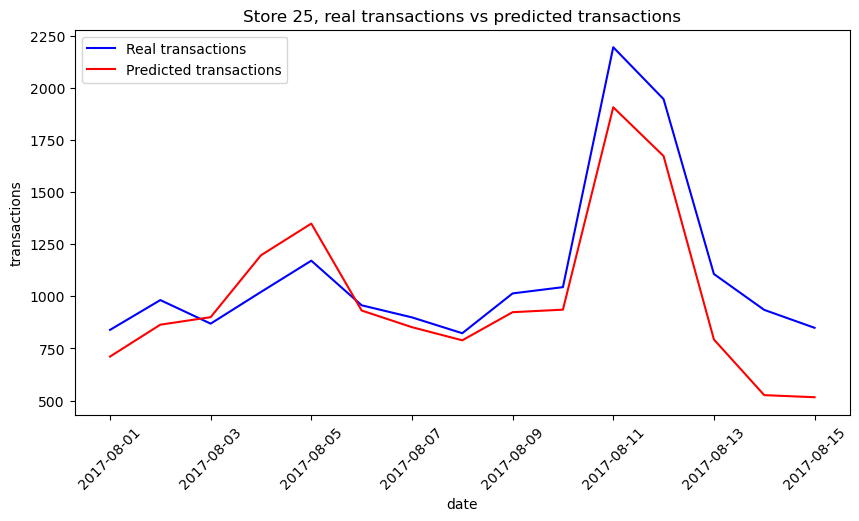

In [33]:
Fig9, ax9 = plt.subplots(figsize=(10, 5))
sns.lineplot(x=test_df25.index, y="transactions", data=test_df25, color="blue", ax=ax9, label="Real transactions")
sns.lineplot(x=test_df25.index, y="predictions", data=test_df25, color="red", ax=ax9, label="Predicted transactions")
ax9.set_title("Store 25, real transactions vs predicted transactions")
plt.xticks(rotation=45)
Fig9.savefig("Store_25_transactions_pred.png", dpi=300, bbox_inches='tight')
plt.show()

# **Store 54**

In [34]:
store_54 = store_data(54)

In [35]:
switch_binom = binom_cat_bool(store_54)
list_binom, list_binom_dict = switch_binom.binom_bool()
store_df = switch_binom.transform()
no_cat_list = ["not a national event","Not a Nat holiday","Nope"]
for col in store_df.columns:
    for no_cat in no_cat_list:
        if store_df[col].dtype == 'category' and no_cat in store_df[col].cat.categories:
            rename_null_cat(store_df,col,no_cat)
multinom_dict_list = []
for col in store_df.columns:
    if store_df[col].dtype == 'category':
        col_encod = my_labelEncoder()
        col_encod.fit(store_df,col)
        col_dict = col_encod.dict_cat
        multinom_dict_list.append(col_dict)
        store_df[col] = col_encod.transform(store_df,col)
store_Aug, store_df = frame_time_of_interest(store_df,8)
split_Lagg = SplitLagg(store_df)
split_Lagg.transactions_X()
X_df = split_Lagg.lagg_X(lags=4)
y_df = split_Lagg.lagg_y(lags=4)
X_train,y_train,X_test,y_test,test_y = split_train_test(X_df,y_df,date="2017-07-31")
predictions_store, test_yPred = recurs_Lin_regr(X_train,y_train,X_test,test_y)

In [36]:
predictions_df = transactions_pred(y_test,predictions_store)

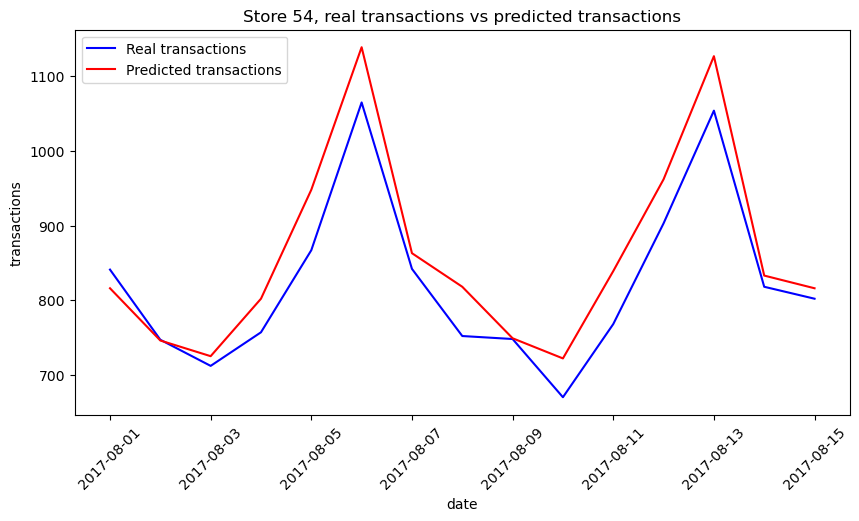

In [37]:
fig10,ax10 = plt.subplots(figsize=(10, 5))
sns.lineplot(x=predictions_df.index, y="transactions", data=predictions_df, color="blue", label="Real transactions", ax=ax10)
sns.lineplot(x=predictions_df.index, y="predictions", data=predictions_df, color="red", label="Predicted transactions", ax=ax10)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
ax10.set_title("Store 54, real transactions vs predicted transactions")
fig10.savefig("Store_54_transactions_pred.png", dpi=300, bbox_inches='tight')
plt.show()

# **Generalisation**

In [38]:
with open("AngeliqueFile.pkl", "rb") as f:
    all_stores = pickle.load(f)

all_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        83488 non-null  datetime64[ns]
 1   store_nbr                   83488 non-null  int64         
 2   transactions                83488 non-null  int64         
 3   National Event              83488 non-null  category      
 4   National holiday            83488 non-null  category      
 5   National period of holiday  83488 non-null  category      
 6   National Workday            83488 non-null  category      
 7   city                        83488 non-null  category      
 8   state                       83488 non-null  category      
 9   type                        83488 non-null  category      
 10  cluster                     83488 non-null  int64         
 11  Local Holiday               83488 non-null  category  

In [39]:
stores_list = list(all_stores["store_nbr"].unique())
stores_list

[25,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 23,
 24,
 26,
 27,
 28,
 30,
 31,
 32,
 33,
 34,
 35,
 37,
 38,
 39,
 40,
 41,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 54,
 36,
 53,
 20,
 29,
 21,
 42,
 22,
 52]

In [40]:
stores_test = pd.DataFrame(test_df25.index, columns=["date"])

In [41]:
#mae_list = []
#rmsle_list = []

for store in stores_list:
    store_dict = {"date": test_df25.index, "Store": [], "value": [], "prediction": []}
    store_df = store_data(store)
    switch_binom = binom_cat_bool(store_df)
    list_binom, list_binom_dict = switch_binom.binom_bool()
    store_df = switch_binom.transform()
    no_cat_list = ["not a national event","Not a Nat holiday","Nope"]
    for col in store_df.columns:
        for no_cat in no_cat_list:
            if store_df[col].dtype == 'category' and no_cat in store_df[col].cat.categories:
                rename_null_cat(store_df,col,no_cat)
    multinom_dict_list = []
    for col in store_df.columns:
        if store_df[col].dtype == 'category':
            col_encod = my_labelEncoder()
            col_encod.fit(store_df,col)
            col_dict = col_encod.dict_cat
            multinom_dict_list.append(col_dict)
            store_df[col] = col_encod.transform(store_df,col)
    store_Aug, store_df = frame_time_of_interest(store_df,8)
    split_Lagg = SplitLagg(store_df)
    split_Lagg.transactions_X()
    X_df = split_Lagg.lagg_X(lags=4)
    y_df = split_Lagg.lagg_y(lags=4)
    X_train,y_train,X_test,y_test,test_y = split_train_test(X_df,y_df,date="2017-07-31")
    predictions_store, test_yPred = recurs_Lin_regr(X_train,y_train,X_test,test_y)
    if "Store" not in stores_test.columns:
        stores_test["Store"] = [25] * len(y_test)
        stores_test["value"] = y_test.values
        stores_test["prediction"] = predictions_store
    else:
        store_dict["value"]= y_test.values
        store_dict["prediction"]= predictions_store
        store_dict["Store"] = [store] * len(y_test)
        store_dict = pd.DataFrame(store_dict)
        stores_test = pd.concat([stores_test, store_dict], ignore_index=True, axis=0)


    #test_df = transactions_pred(y_test,predictions_store)
    #mae_store = mae(test_df["transactions"],test_df["predictions"])
    #rmsle_store = rmsle(test_df["transactions"],test_df["predictions"])
    #mae_list.append(mae_store)
    #rmsle_list.append(rmsle_store)


In [42]:
stores_test.head()

,date,Store,value,prediction
0,2017-08-01,25,839,711.965361
1,2017-08-02,25,982,864.963848
2,2017-08-03,25,869,900.884604
3,2017-08-04,25,1021,1197.358942
4,2017-08-05,25,1171,1349.936724


In [43]:
stores_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        810 non-null    datetime64[ns]
 1   Store       810 non-null    int64         
 2   value       810 non-null    int64         
 3   prediction  810 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 25.4 KB


In [44]:
stores_test.set_index(["date","Store"], inplace=True)
stores_test.sort_index(level=["date","Store"], inplace=True)
stores_test.head()

value   prediction
date       Store                    
2017-08-01 1       1795  1784.879025
           2       1819  1765.896975
           3       3066  2848.756789
           4       1362  1308.264217
           5       1365  1230.748138

In [45]:
stores_test["prediction"] = stores_test["prediction"].astype(int)

In [46]:
stores_test["sle"] = (np.log(stores_test["prediction"] + 1) - np.log(stores_test["value"] + 1))**2
stores_test["abs err"] = abs(stores_test["value"] - stores_test["prediction"])

c:\Users\Angelique\anaconda3\envs\Essai\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [47]:
metric_dict = {"msle":[],"rmsle":[], "sem rmsle":[], "mae":[], "sem mae":[]}
date_list = stores_test.index.get_level_values(0).unique()
for date in date_list:
    stores_test_date = stores_test.loc[date]
    rmsle_store = np.sqrt(stores_test_date["sle"].mean())
    mae_store = stores_test_date["abs err"].mean()
    msle_store = stores_test_date["sle"].mean()
    sem_rmsle = np.sqrt(stores_test_date["sle"].std()) / np.sqrt(len(stores_test_date))
    sem_mae = stores_test_date["abs err"].std() / np.sqrt(len(stores_test_date))
    metric_dict["rmsle"].append(rmsle_store)
    metric_dict["mae"].append(mae_store)
    metric_dict["msle"].append(msle_store)
    metric_dict["sem rmsle"].append(sem_rmsle)
    metric_dict["sem mae"].append(sem_mae)
metrics_per_date = pd.DataFrame(metric_dict, index=date_list)
metrics_per_date

,msle,rmsle,sem rmsle,mae,sem mae
date,,,,,
2017-08-01,0.010974,0.104755,0.016201,139.833333,15.444288
2017-08-02,0.008501,0.092201,0.014229,135.685185,18.103318
2017-08-03,0.003819,0.061797,0.011405,73.518519,11.528434
2017-08-04,0.003432,0.058584,0.009889,71.518519,9.438600
2017-08-05,0.004935,0.070248,0.011940,88.240741,7.644757
2017-08-06,0.012833,0.113285,0.023013,117.074074,13.365210
2017-08-07,0.005482,0.074042,0.013717,79.537037,9.641104
2017-08-08,0.008140,0.090219,0.019342,85.944444,12.110065
2017-08-09,0.009980,0.099901,0.023795,92.425926,12.942290


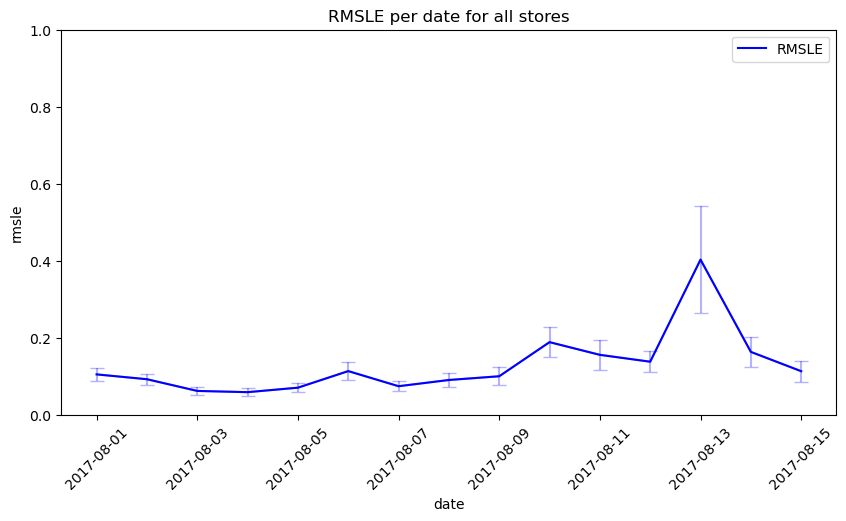

In [48]:
fig11,ax11 = plt.subplots(figsize=(10, 5))
sns.lineplot(x=metrics_per_date.index, y="rmsle", data=metrics_per_date, color="blue", label="RMSLE", ax=ax11)
ax11.errorbar(x=metrics_per_date.index, y=metrics_per_date["rmsle"], yerr=metrics_per_date["sem rmsle"], color="blue", alpha=0.3, capsize=5)
plt.xticks(rotation=45)
plt.ylim(0,1)
ax11.set_title("RMSLE per date for all stores")
fig11.savefig("RMSLE_per_date_all_stores.png", dpi=300, bbox_inches='tight')
plt.show()

In [49]:
metrics_per_date["mae"].describe()

count     15.000000
mean     131.635802
std       51.461401
min       71.518519
25%       87.092593
50%      128.740741
75%      167.620370
max      225.722222
Name: mae, dtype: float64

date       |msle	   |  rmsle	   | sem rmsle  |  mae   |  sem mae
-------    |---------  | --------  |   -----   |  -----  |  ------
2017-08-01 |0.010974 |	0.104755 |	0.016201 |	139.833333 |	15.444288
2017-08-02 |	0.008501 |	0.092201 |	0.014229 |	135.685185 |	18.103318
2017-08-03 |	0.003819 |	0.061797 |	0.011405 |	73.518519 |	11.528434
2017-08-04 |	0.003432 |	0.058584 |	0.009889 |	71.518519 |	9.438600
2017-08-05 | 	0.004935 |	0.070248 |	0.011940 |	88.240741 |	7.644757
2017-08-06 |	0.012833 |	0.113285 |	0.023013 |	117.074074 |	13.365210
2017-08-07 |	0.005482 |	0.074042 |	0.013717 |	79.537037 |	9.641104
2017-08-08 |	0.008140 |	0.090219 |	0.019342 |	85.944444 |	12.110065
2017-08-09 |	0.009980 |	0.099901 |	0.023795 |	92.425926 |	12.942290
2017-08-10 |	0.035539 |	0.188517 |	0.039136 |	225.722222 |	34.484650
2017-08-11 |	0.024189 |	0.155529 |	0.039537 |	184.907407 |	23.037163
2017-08-12 |	0.018960 |	0.137697 |	0.027926 |	204.111111 |	30.088568
2017-08-13 |	0.162307 |	0.402873 |	0.139283 |	196.944444 |	24.586325
2017-08-14 |	0.026636 |	0.163204 |	0.038440 |	150.333333 |	26.990228
2017-08-15 |	0.012791 |	0.113096 |	0.027496 |	128.740741 |	30.603483




date       |msle	   |  rmsle	   | mae  
-------    |---------  | --------  |-----			
2017-08-01|	0.010169	|0.100842	|130.962963
2017-08-02|	0.008171	|0.090394	|112.759259
2017-08-03|	0.007935	|0.089080	|111.703704
2017-08-04|	0.007706	|0.087781	|112.537037
2017-08-05|	0.013183	|0.114819	|171.500000
2017-08-06|	0.019614	|0.140050	|181.129630
2017-08-07|	0.005641	|0.075103	|96.500000
2017-08-08|	0.007702	|0.087760	|114.222222
2017-08-09|	0.010278	|0.101380	|104.685185
2017-08-10|	0.035359	|0.188039	|260.537037
2017-08-11|	0.019066	|0.138080	|231.111111
2017-08-12|	0.009613	|0.098047	|145.018519
2017-08-13|	0.016860	|0.129845	|134.685185
2017-08-14|	0.055418	|0.235411	|143.462963
2017-08-15|	0.013762	|0.117312	|124.333333


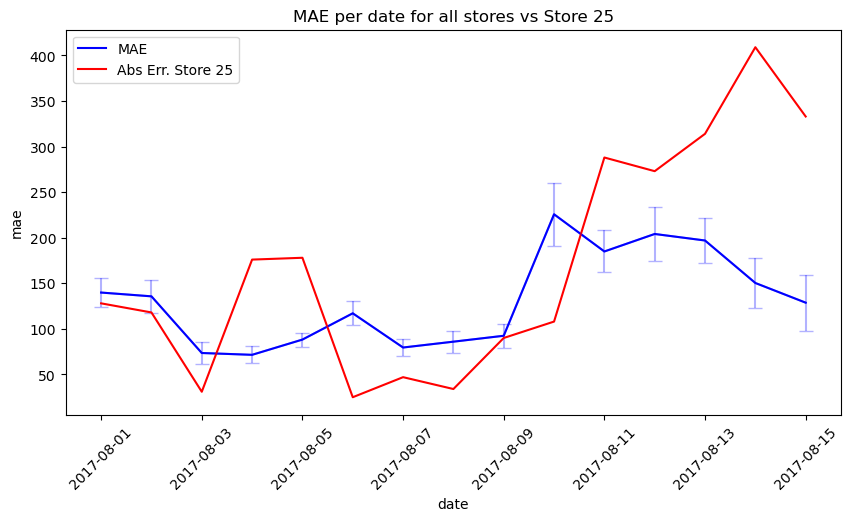

In [50]:
fig13,ax13 = plt.subplots(figsize=(10, 5))
sns.lineplot(x=metrics_per_date.index, y="mae", data=metrics_per_date, color="blue", label="MAE", ax=ax13)
ax13.errorbar(x=metrics_per_date.index, y=metrics_per_date["mae"], yerr=metrics_per_date["sem mae"], color="blue", alpha=0.3, capsize=5)
sns.lineplot(x=metrics_per_date.index, y="abs error", data=test_df25, color="red", label="Abs Err. Store 25", ax=ax13)
ax13.set_title("MAE per date for all stores vs Store 25")
plt.xticks(rotation=45)
fig13.savefig("MAE_per_date_all_stores_vs_Store_25.png", dpi=300, bbox_inches='tight')
plt.show()

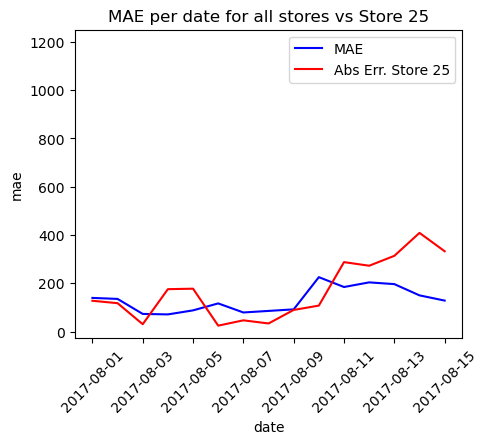

In [51]:
fig14,ax14 = plt.subplots(figsize=(5, 4))
sns.lineplot(x=metrics_per_date.index, y="mae", data=metrics_per_date, color="blue", label="MAE", ax=ax14)
sns.lineplot(x=metrics_per_date.index, y="abs error", data=test_df25, color="red", label="Abs Err. Store 25", ax=ax14)
ax14.set_ylim(-25, 1250)
ax14.set_title("MAE per date for all stores vs Store 25")
plt.xticks(rotation=45)
fig14.savefig("MAE_vs_Store_25.png", dpi=300, bbox_inches='tight')
plt.show()

In [52]:
test_df25.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2017-08-01 to 2017-08-15
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   transactions  15 non-null     int64  
 1   predictions   15 non-null     int32  
 2   abs error     15 non-null     int64  
 3   lse           15 non-null     float64
dtypes: float64(1), int32(1), int64(2)
memory usage: 540.0 bytes


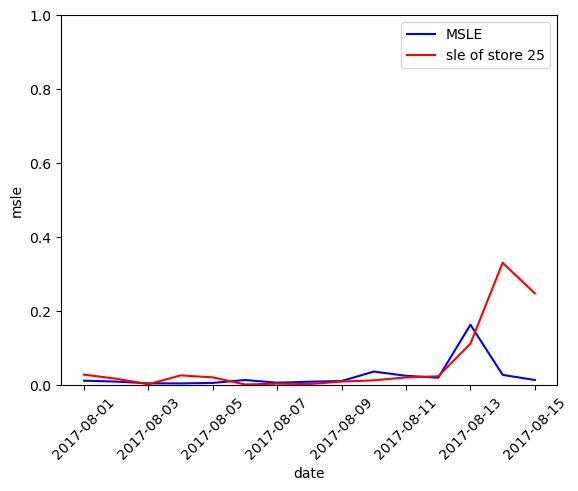

In [53]:
sns.lineplot(x=metrics_per_date.index, y="msle", data=metrics_per_date, color="blue", label="MSLE")
sns.lineplot(x=metrics_per_date.index, y="lse", data=test_df25, color="red", label="sle of store 25")
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()

In [54]:
perform_dict = {"store_nbr":stores_list, "mae":mae_list, "rmsle":rmsle_list}
store_perform = pd.DataFrame(perform_dict)
store_perform["mae"].describe()

NameError: name 'mae_list' is not defined

In [ ]:
store_perform["rmsle"].describe()

count    54.000000
mean      0.109918
std       0.063438
min       0.061635
25%       0.080031
50%       0.095363
75%       0.113674
max       0.494444
Name: rmsle, dtype: float64